In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from MuC import plot_tools as pt
from MuC import beam_optics

# Plotting the detector geometry in terms of density

NOTE: Is this up to date?

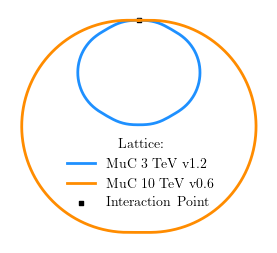

In [83]:
fig, ax = pt.std_fig()
df = pd.read_pickle('beam-optics/ring_3tev_v1.2_df.pkl')
ax.plot(df["x"] * 1e2, df["y"] * 1e2, linewidth=2, c="dodgerblue", label='MuC 3 TeV v1.2')
smax = df['X'].max()

df = pd.read_pickle('beam-optics/ring_v06_df.pkl')
ax.plot(df["x"] * 1e2, df["y"] * 1e2, linewidth=2, c="darkorange", label="MuC 10 TeV v0.6")
smax = df['X'].max()

ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_aspect('equal')
ax.set_yticks([])
ax.set_xticks([])
ax.set_axis_off()
ax.scatter(0, 0, c='black', s=10, marker='s', label='Interaction Point')
ax.legend(loc=(0.2, 0.12), title='Lattice:')
fig.savefig('plots/beam_optics/beam_optics_comparison.pdf', dpi=400, bbox_inches='tight')

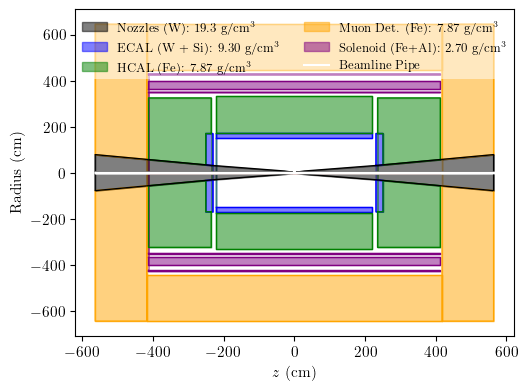

In [2]:
# densities approximated
ECAL1=[[-221, -221, 221, 221, -221],[150, 170.2, 170.2, 150, 150]]
ECAL2 = [[230.7, 230.7, 250.9, 250.9, 230.7],[31, 170, 170, 33.9, 31]]
ECAL3 = [[-1 * i for i in ECAL2[0]], ECAL2[1]]

HCAL1 = [[-221, -221, 221, 221, -221],[174, 333, 333, 174, 174]]
HCAL2= [[235.4, 235.4, 412.9, 412.9,250.9, 250.9,235.4],[170, 324.6, 324.6, 56.8,33.9, 170,170]]
HCAL3 = [[-1 * i for i in HCAL2[0]], HCAL2[1]]

MD1 = [[-417.9, -417.9, 417.9, 417.9, -417.9],[446.1, 645, 645, 446.1, 446.1]]
MD2 = [[417.9, 417.9, 563.8, 563.8, 417.9],[57.5, 645, 645, 78.2, 57.5]]
MD3 = [[-1 * i for i in MD2[0]], MD2[1]]

BP = [[-564, -564, 564, 564, -564], [-2.2, 2.2, 2.2, -2.2, -2.2]]

SOLENOID_1 =[[-412.9, -412.9, 412.9, 412.9, -412.9],[348.3, 352.3, 352.3, 348.3, 348.3]]
SOLENOID_2 =[[-412.9, -412.9, 412.9, 412.9, -412.9],[364.9, 399.3, 399.3, 364.9, 364.9]]
SOLENOID_3 =[[-412.9, -413.9, 412.9, 412.9, -412.9],[425, 429, 429, 425, 425]]


CONE1 = [[6.5,28.2, 230.7, 417.9, 563.8, 563.8, 6.5],[2.2,7.0, 31.0, 57.5, 78.2, 2.2, 2.2]]
CONE2 = [[-1 * i for i in CONE1[0]], CONE1[1]]

dets = [ECAL1, ECAL2, ECAL3, HCAL1, HCAL2, HCAL3,SOLENOID_1 , SOLENOID_2, SOLENOID_3, MD1, MD2, MD3, CONE1, CONE2, BP]
cols = ['blue'] *3 + ['green']*3 + ['purple'] *3 + ['orange'] *3 + ['black']*2 + ['white']

fig, ax = pt.std_fig(figsize=pt.std_figsize*np.array([1.25,1.4]))

for i, det in enumerate(dets):
    ax.plot(det[0],det[1], color = cols[i], lw=1)
    ax.fill_between(det[0], det[1], color = cols[i], alpha=0.5)
    new_y =[-1*k for k in det[1]]
    ax.plot(det[0], new_y, color = cols[i], lw=1)
    ax.fill_between(det[0], new_y, color = cols[i], alpha=0.5)



# dets = [T1, ECAL1, ECAL2, ECAL3, HCAL1, HCAL2, HCAL3,SOLENOID, MD1, MD2, MD3, CONE1, CONE2, BL]
# cols = ['lightgrey']*1 + ['dimgrey']*3 + ['grey']*3 + ['darkgrey'] + 3*['grey'] + ['black']*2 + ['white']

ax.fill_between([],[],color = 'black', label=r'Nozzles (W): $19.3$ g/cm$^3$ ', alpha=0.5)
ax.fill_between([],[],color = 'blue', label=r'ECAL (W + Si): $9.30$ g/cm$^3$', alpha=0.5)
ax.fill_between([],[],color = 'green', label=r'HCAL (Fe): $7.87$ g/cm$^3$', alpha=0.5)
ax.fill_between([],[],color = 'orange', label=r'Muon Det. (Fe): $7.87$ g/cm$^3$', alpha=0.5)
ax.fill_between([],[],color = 'purple', label=r'Solenoid (Fe+Al): $2.70$ g/cm$^3$', alpha=0.5)
ax.plot([],[],color= 'white', label='Beamline Pipe')

ax.set_xlabel(r"$z$ (cm)")
ax.set_ylabel(r"Radius (cm)")
ax.legend(loc='upper center', frameon=True, fontsize=9, ncol=2, framealpha=0.5, edgecolor='None')
fig.savefig("plots/detector_geometries/muon_detector_approx.pdf", bbox_inches='tight', dpi=500)

## Some old code presumably to check geometries.

In [ ]:

VD1=[[-65,-65,65,65, -65],[3,10.4,10.4,3,3]]
VD2 = [[8, 8, 28.2, 28.2,8], [2.5, 11.20, 11.2, 2.5,2.5]]
VD3 = [[-1 * i for i in VD2[0]], VD2[1]]


IT1 = [[48.2, 48.2, 69.2, 69.2, 48.2],[12.7,55.4, 55.4, 12.7, 12.7]]
IT2 = [[-1 * i for i in IT1[0]], IT1[1]]
IT3=[[52.4,52.4,219.0,219.0, 52.4],[40.5, 55.5, 55.5, 40.5, 40.5]]
IT4=[[-1 * i for i in IT3[0]], IT3[1]]

OT1=[[-124.9,-124.9,124.9,124.9, -124.9],[81.9, 148.6, 148.6, 81.9, 81.9]]
OT2= [[131, 131, 219, 219, 131],[61.8, 143, 143, 61.8, 61.8]]
OT3 = [[-1 * i for i in OT2[0]], OT2[1]]

ECAL1=[[-221, -221, 221, 221, -221],[150, 170.2, 170.2, 150, 150]]
ECAL2 = [[230.7, 230.7, 250.9, 250.9, 230.7],[31.0, 170, 170, 31, 31]]
ECAL3 = [[-1 * i for i in ECAL2[0]], ECAL2[1]]

HCAL1 = [[-221, -221, 221, 221, -221],[174, 333, 333, 174, 174]]
HCAL2= [[235.4, 235.4, 412.9, 412.9, 235.4],[307, 324.6, 324.6, 307, 307]]
HCAL3 = [[-1 * i for i in HCAL2[0]], HCAL2[1]]

SOLENOID =[[-412.9, -412.9, 412.9, 412.9, -412.9],[348.3, 429, 429, 348.3, 348.3]]

MD1 = [[-417.9, -417.9, 417.9, 417.9, -417.9],[446.1, 645, 645, 446.1, 446.1]]
MD2 = [[417.9, 417.9, 563.8, 563.8, 417.9],[57.5, 645, 645, 57.5, 57.5]]
MD3 = [[-1 * i for i in MD2[0]], MD2[1]]

CONE1 = [[65,69.2,250.9,563.8,563.8,65],[3,12.7,31,57.5,3,3]]
CONE2 = [[-1 * i for i in CONE1[0]], CONE1[1]]

BL = [[-563.8, -563.8, 563.8, 563.8, -563.8], [-2.2, 2.2, 2.2, -2.2, -2.2]]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mhostert/Repos/BIN_MC-1/plots_Luc/muon_detector_parts.jpg'

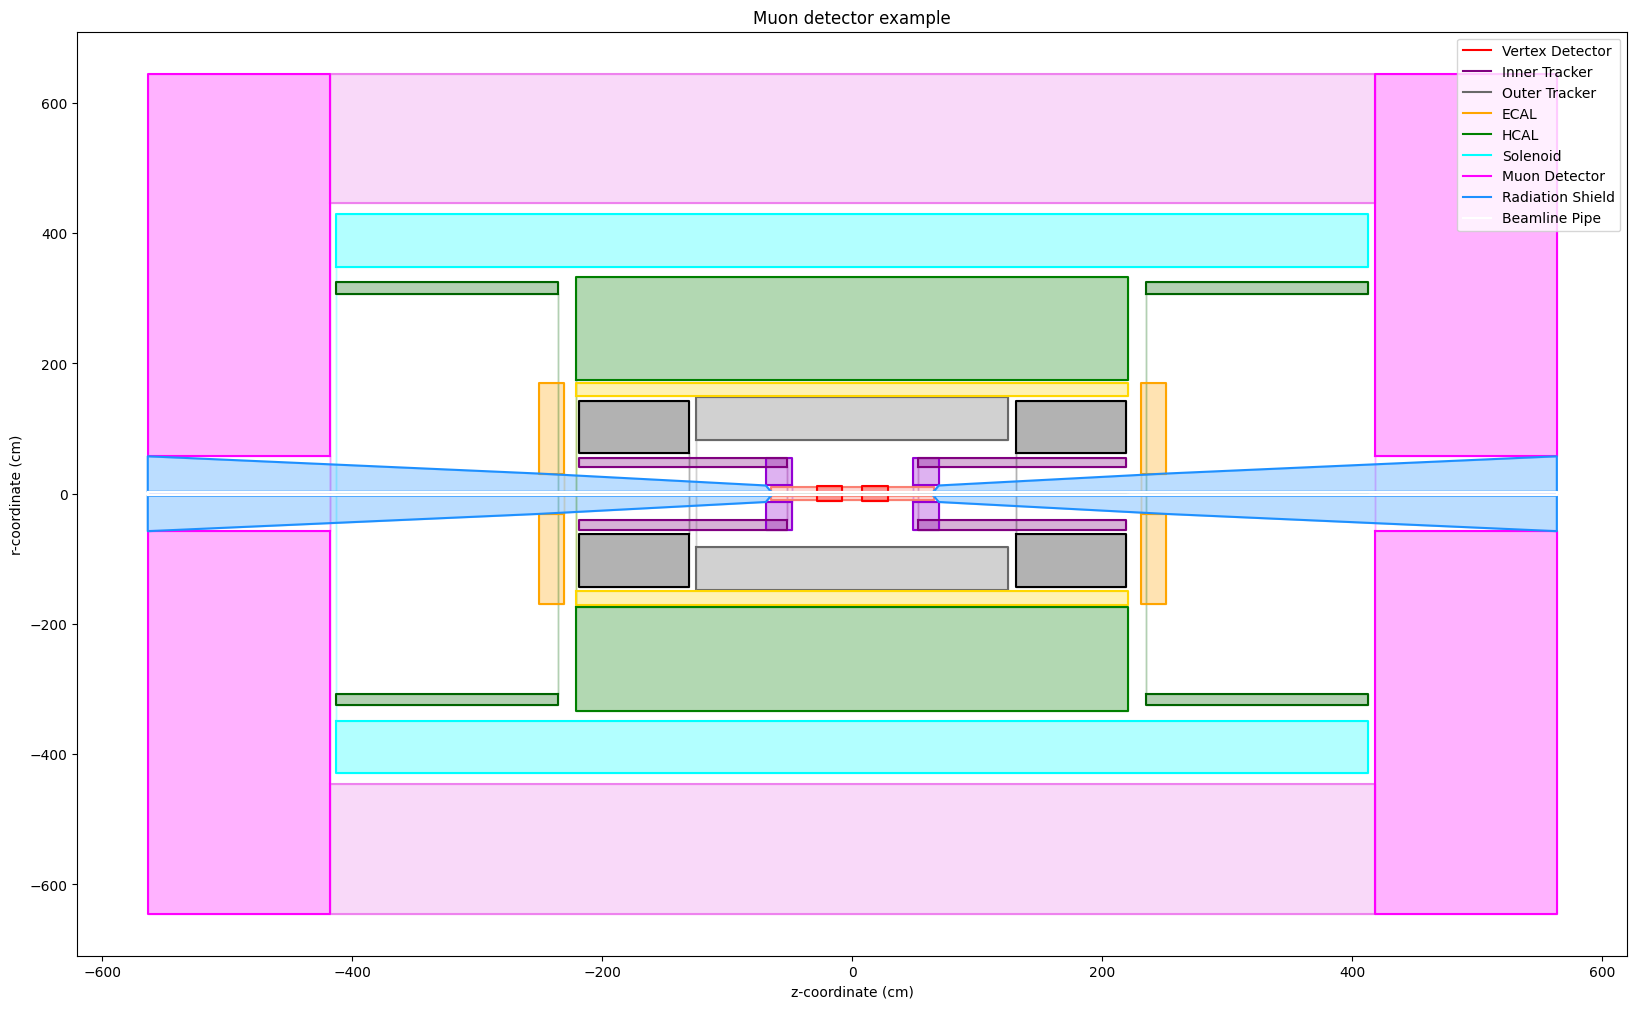

In [2]:
# data from paper exactly
dets = [VD1, VD2, VD3, IT1, IT2, IT3, IT4, OT1, OT2, OT3, ECAL1, ECAL2, ECAL3, HCAL1, HCAL2, HCAL3,SOLENOID, MD1, MD2, MD3, CONE1, CONE2, BL]
cols = ['salmon']+['red']*2 + ['darkviolet']*2+['purple']*2 + ['dimgrey']+['black']*2 + ['gold'] +['orange'] * 2 + ['green'] + ['darkgreen']*2 + ['cyan']*1 + ['violet']+['magenta']*2 + ['dodgerblue']*2+ ['white']
plt.figure(figsize = (20,12))
for i, det in enumerate(dets):
    plt.plot(det[0],det[1], color = cols[i])
    plt.fill_between(det[0], det[1], color = cols[i], alpha=0.3)
    new_y =[-1*k for k in det[1]]
    plt.plot(det[0], new_y, color = cols[i])
    plt.fill_between(det[0], new_y, color = cols[i], alpha=0.3)

plt.plot([],[],color = 'red', label='Vertex Detector')
plt.plot([],[],color = 'purple', label='Inner Tracker')
plt.plot([],[],color = 'dimgrey', label='Outer Tracker')
plt.plot([],[],color = 'orange', label='ECAL')
plt.plot([],[],color = 'green', label='HCAL')
plt.plot([],[],color = 'cyan', label='Solenoid')
plt.plot([],[],color = 'magenta', label='Muon Detector')
plt.plot([],[],color='dodgerblue', label='Radiation Shield')
plt.plot([],[],color='white', label='Beamline Pipe')

plt.xlabel("z-coordinate (cm)")
plt.ylabel("r-coordinate (cm)")
plt.title("Muon detector example")
plt.legend(loc='upper right')
plt.savefig("plots_Luc/muon_detector_parts.jpg", bbox_inches='tight', dpi=300)
plt.show()

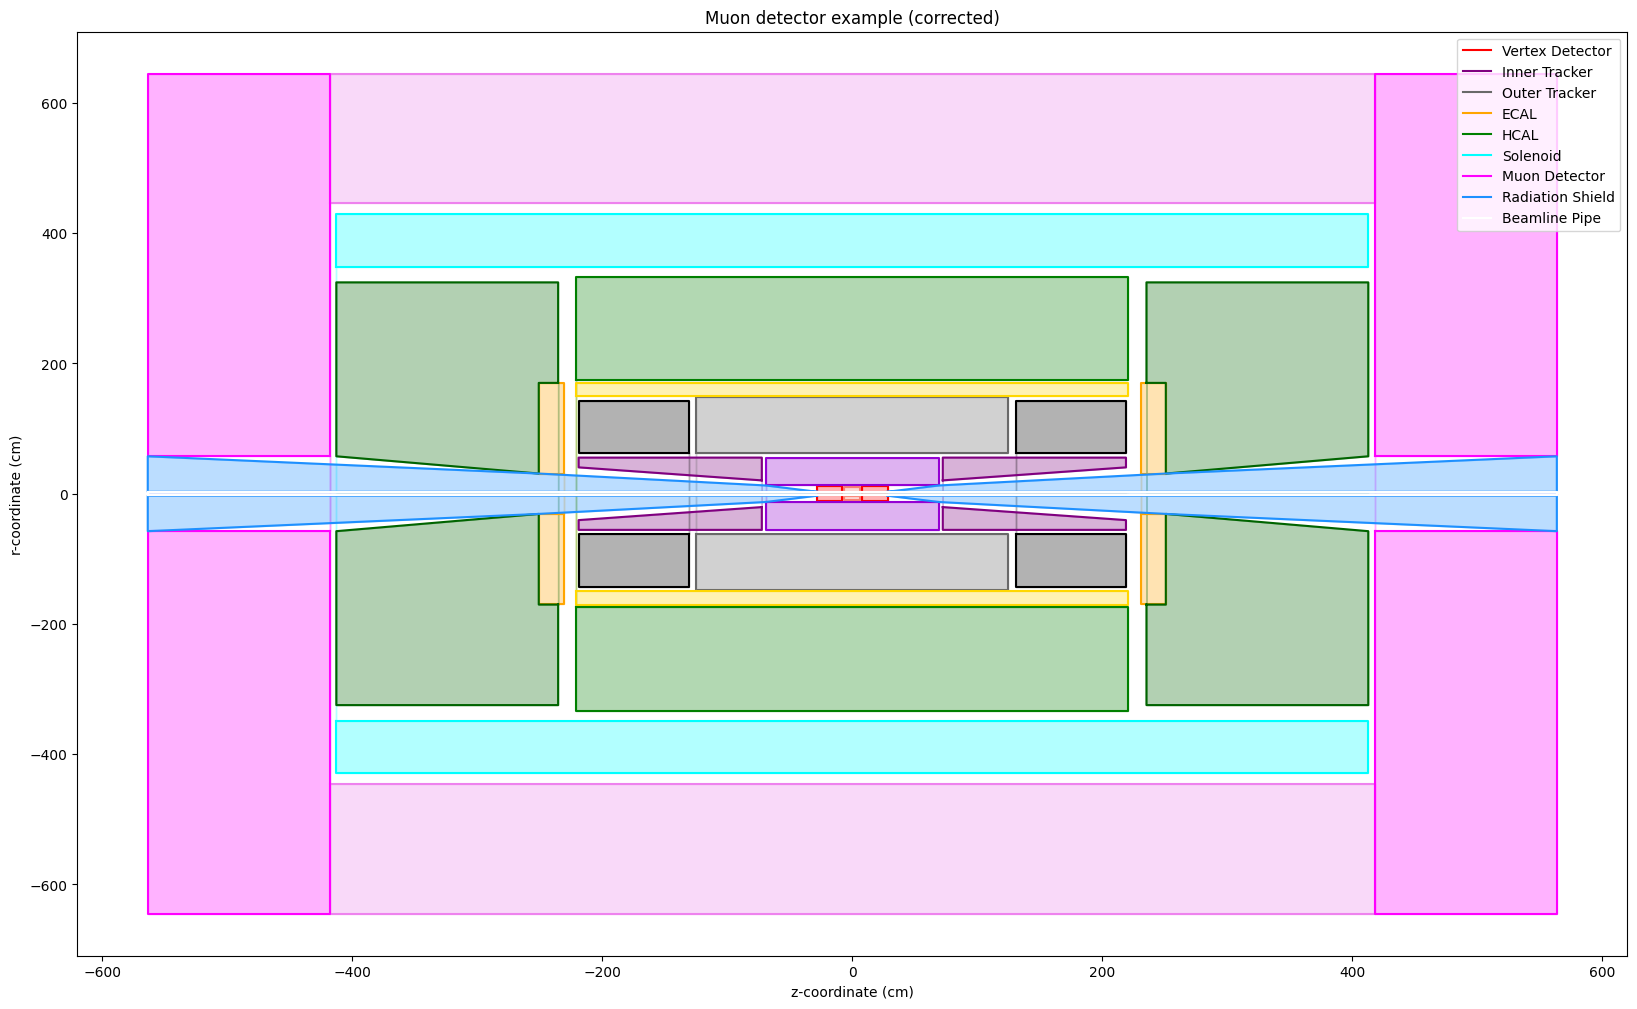

In [7]:
# perhaps upgraded detector

# changed length of barrel of VD from 65 cm to 6.5
VD1=[[-6.5,-6.5,6.5,6.5, -6.5],[3,10.4,10.4,3,3]]

# changed IT barrel to encompass area above and the endcap to not overlap and not leave much free space
IT1 = [[-69.2, -69.2, 69.2, 69.2, -69.2],[12.7,55.4, 55.4, 12.7, 12.7]]
IT3=[[72.4,72.4,219.0,219.0, 72.4],[20.5, 55.5, 55.5, 40.5, 20.5]]
IT4=[[-1 * i for i in IT3[0]], IT3[1]]

# changed OT barrel to encompass empty space and match its endcap
OT1=[[-124.9,-124.9,124.9,124.9, -124.9],[61.9, 148.6, 148.6, 61.9, 61.9]]

# changed HCAL radius of endcap to encompass free space
HCAL2= [[235.4, 235.4, 412.9, 412.9,250.9, 250.9,235.4],[170.2, 324.6, 324.6, 57.5,31, 170.2,170.2]]
HCAL3 = [[-1 * i for i in HCAL2[0]], HCAL2[1]]

# changed cone end to accurately represent changes made
CONE1 = [[28.2,69.2,250.9,563.8,563.8,28.2],[3,12.7,31,57.5,3,3]]
CONE2 = [[-1 * i for i in CONE1[0]], CONE1[1]]

dets = [VD1, VD2, VD3, IT1, IT3, IT4, OT1, OT2, OT3, ECAL1, ECAL2, ECAL3, HCAL1, HCAL2, HCAL3,SOLENOID, MD1, MD2, MD3, CONE1, CONE2, BL]
cols = ['salmon']+['red']*2 + ['darkviolet'] + ['purple']*2 + ['dimgrey']+['black']*2 + ['gold'] +['orange'] * 2 + ['green'] + ['darkgreen']*2 + ['cyan']*1 + ['violet']+['magenta']*2 + ['dodgerblue']*2+ ['white']
plt.figure(figsize = (20,12))
for i, det in enumerate(dets):
    plt.plot(det[0],det[1], color = cols[i])
    plt.fill_between(det[0], det[1], color = cols[i], alpha=0.3)
    new_y =[-1*k for k in det[1]]
    plt.plot(det[0], new_y, color = cols[i])
    plt.fill_between(det[0], new_y, color = cols[i], alpha=0.3)

plt.plot([],[],color = 'red', label='Vertex Detector')
plt.plot([],[],color = 'purple', label='Inner Tracker')
plt.plot([],[],color = 'dimgrey', label='Outer Tracker')
plt.plot([],[],color = 'orange', label='ECAL')
plt.plot([],[],color = 'green', label='HCAL')
plt.plot([],[],color = 'cyan', label='Solenoid')
plt.plot([],[],color = 'magenta', label='Muon Detector')
plt.plot([],[],color='dodgerblue', label='Radiation Shield')
plt.plot([],[],color='white', label='Beamline Pipe')

plt.xlabel("z-coordinate (cm)")
plt.ylabel("r-coordinate (cm)")
plt.title("Muon detector example (corrected)")
plt.legend(loc='upper right')
plt.savefig("plots/detector_geometries/muon_detector_parts_corrected.jpg", bbox_inches='tight', dpi=300)
plt.show()

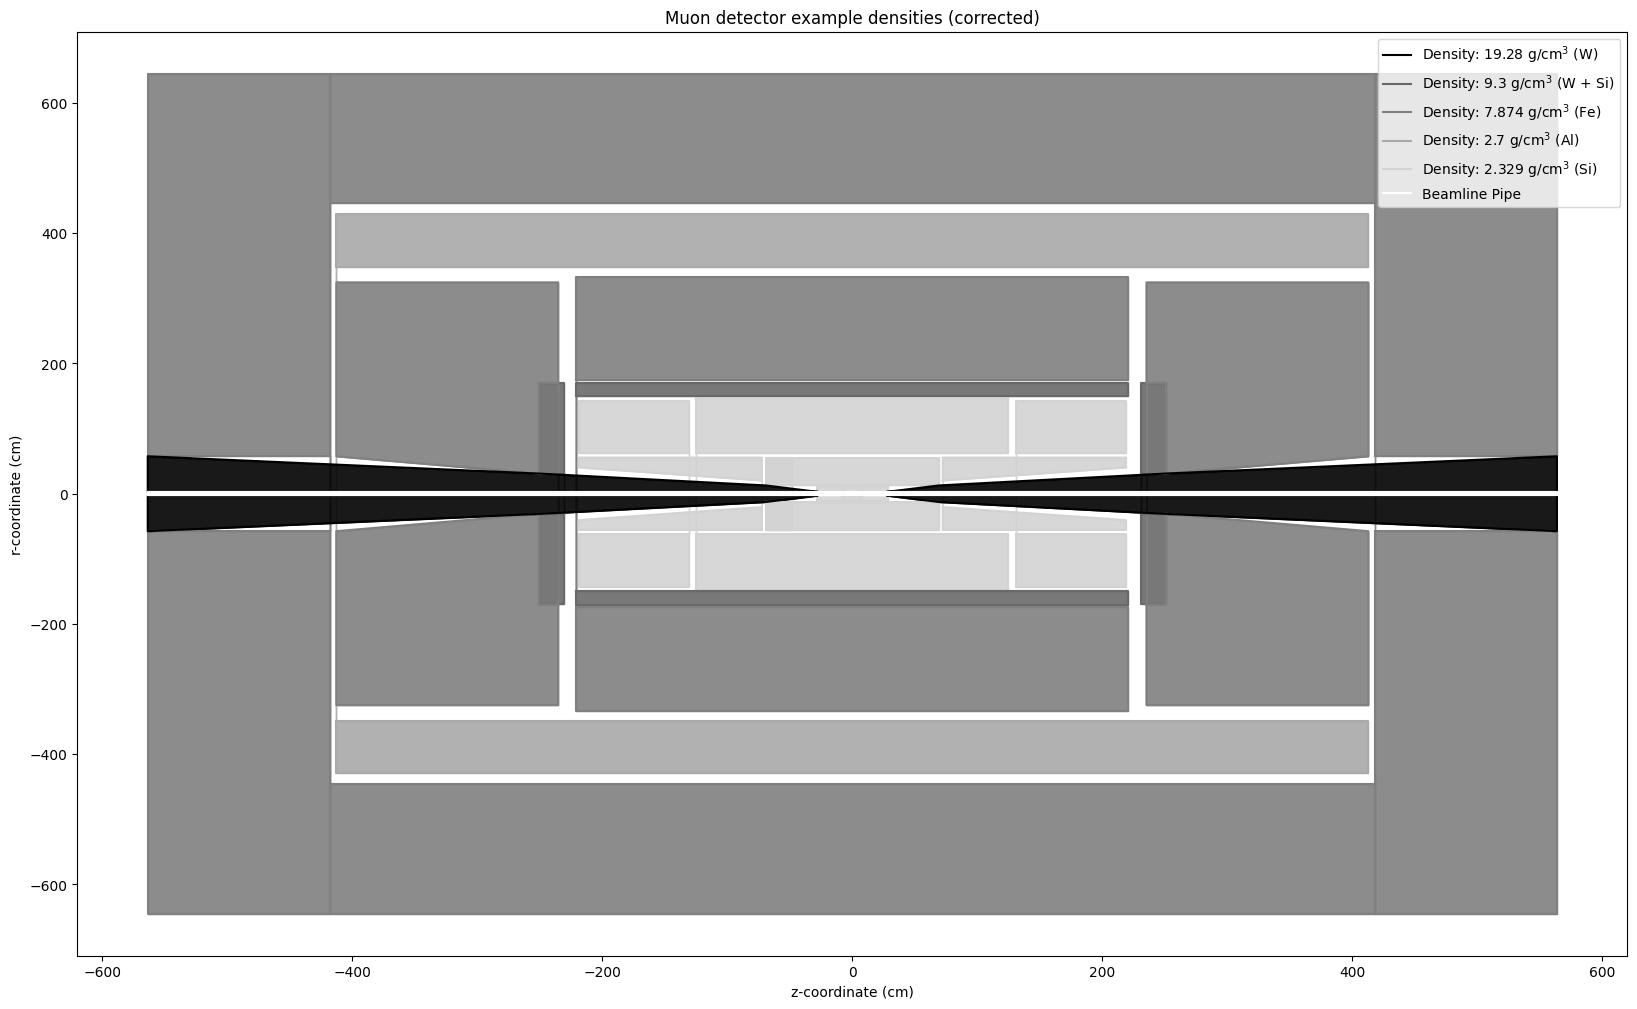

In [10]:
# densities (corrected)
dets = [VD1, VD2, VD3, IT1, IT2, IT3, IT4, OT1, OT2, OT3, ECAL1, ECAL2, ECAL3, HCAL1, HCAL2, HCAL3,SOLENOID, MD1, MD2, MD3, CONE1, CONE2, BL]
cols = ['lightgrey']*10 + ['dimgrey']*3 + ['grey']*3 + ['darkgrey'] + 3*['grey'] + ['black']*2 + ['white']
plt.figure(figsize = (20,12))
for i, det in enumerate(dets):
    plt.plot(det[0],det[1], color = cols[i])
    plt.fill_between(det[0], det[1], color = cols[i], alpha=0.9)
    new_y =[-1*k for k in det[1]]
    plt.plot(det[0], new_y, color = cols[i])
    plt.fill_between(det[0], new_y, color = cols[i], alpha=0.9)

plt.plot([],[],color = 'black', label=r'Density: 19.28 g/cm$^3$ (W)')
plt.plot([],[],color = 'dimgrey', label=r'Density: 9.3 g/cm$^3$ (W + Si)')
plt.plot([],[],color = 'grey', label=r'Density: 7.874 g/cm$^3$ (Fe)')
plt.plot([],[],color = 'darkgrey', label=r'Density: 2.7 g/cm$^3$ (Al)')
plt.plot([],[],color = 'lightgrey', label=r'Density: 2.329 g/cm$^3$ (Si)')
plt.plot([],[],color= 'white', label='Beamline Pipe')

plt.xlabel("z-coordinate (cm)")
plt.ylabel("r-coordinate (cm)")
plt.title("Muon detector example densities (corrected)")
plt.legend(loc='upper right')
plt.savefig("plots/detector_geometries/muon_detector_densities_corrected.jpg", bbox_inches='tight', dpi=300)

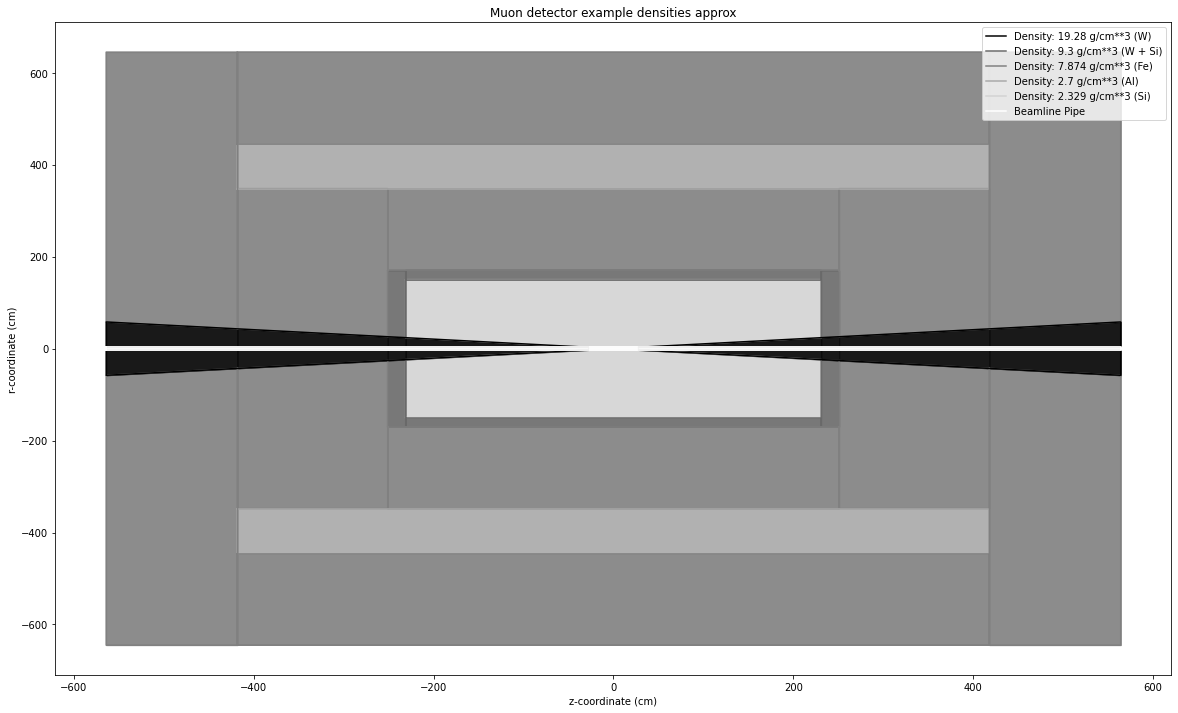

In [6]:
# densities approximated

T1 = [[-231, 231,231,28,-28,-231,-231], [150,150,24,3,3,24,150]]

ECAL1=[[-231, -231, 231, 231, -231],[150, 170, 170, 150, 150]]
ECAL2 = [[231, 231, 251, 251, 231],[24, 170, 170, 26, 24]]
ECAL3 = [[-1 * i for i in ECAL2[0]], ECAL2[1]]

HCAL1 = [[-251, -251, 251, 251, -251],[170, 348, 348, 170, 170]]
HCAL2= [[251, 251, 418, 418,251, 251,251],[170, 348, 348, 43,26, 170,170]]
HCAL3 = [[-1 * i for i in HCAL2[0]], HCAL2[1]]

SOLENOID =[[-418, -418, 418, 418, -418],[348, 446, 446, 348, 348]]

MD1 = [[-418, -418, 418, 418, -418],[446, 645, 645, 446, 446]]
MD2 = [[418, 418, 564, 564, 418],[43, 645, 645, 58, 43]]
MD3 = [[-1 * i for i in MD2[0]], MD2[1]]

CONE1 = [[28,564,564,28],[3,58,3,3]]
CONE2 = [[-1 * i for i in CONE1[0]], CONE1[1]]

BL = [[-564, -564, 564, 564, -564], [-3, 3, 3, -3, -3]]

dets = [T1, ECAL1, ECAL2, ECAL3, HCAL1, HCAL2, HCAL3,SOLENOID, MD1, MD2, MD3, CONE1, CONE2, BL]
cols = ['lightgrey']*1 + ['dimgrey']*3 + ['grey']*3 + ['darkgrey'] + 3*['grey'] + ['black']*2 + ['white']
plt.figure(figsize = (20,12))
for i, det in enumerate(dets):
    plt.plot(det[0],det[1], color = cols[i])
    plt.fill_between(det[0], det[1], color = cols[i], alpha=0.9)
    new_y =[-1*k for k in det[1]]
    plt.plot(det[0], new_y, color = cols[i])
    plt.fill_between(det[0], new_y, color = cols[i], alpha=0.9)

plt.plot([],[],color = 'black', label='Density: 19.28 g/cm**3 (W)')
plt.plot([],[],color = 'dimgrey', label='Density: 9.3 g/cm**3 (W + Si)')
plt.plot([],[],color = 'grey', label='Density: 7.874 g/cm**3 (Fe)')
plt.plot([],[],color = 'darkgrey', label='Density: 2.7 g/cm**3 (Al)')
plt.plot([],[],color = 'lightgrey', label='Density: 2.329 g/cm**3 (Si)')
plt.plot([],[],color= 'white', label='Beamline Pipe')

plt.xlabel("z-coordinate (cm)")
plt.ylabel("r-coordinate (cm)")
plt.title("Muon detector example densities approx")
plt.legend(loc='upper right')
plt.savefig("plots_Luc/muon_detector_densities_approx.jpg", bbox_inches='tight', dpi=300)

In [27]:
s = 0.10261194029850747
b = 0.12686567164178797
def get_y(x):
    return s*x + b
get_y(231)

23.830223880597014

In [33]:
# approximate muon detector (v1)

from detector_geometries.helpers import face

muon_detector = face(7.874)
solenoid = face(2.7)
hcal = face(7.874)
ecal = face(9.3)
tracker = face(2.329)
cone = face(19.28)


OBJECTS = []

AttributeError: 'face' object has no attribute 'id'

In [12]:
def interpolation(p1, p2, x):
    s = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p2[1] - s * p2[0]
    return b + s*x

In [13]:
interpolation([230.7, 31],[417.9, 57.5],250.9)

33.85950854700855

In [15]:
interpolation([230.7, 31],[417.9, 57.5],563.8)

56.79220085470085

In [17]:
interpolation([230.7, 31],[417.9, 57.5],563.8)

78.15357905982904

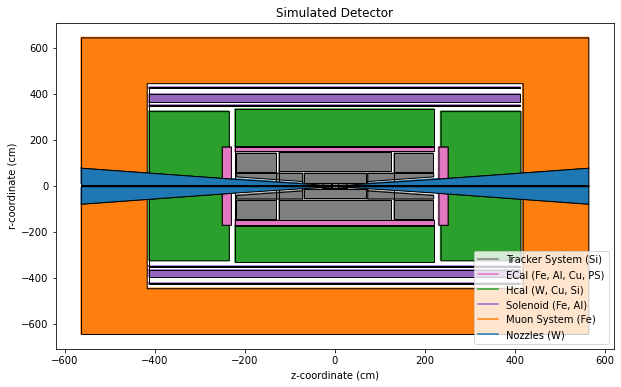

In [38]:
import matplotlib.pyplot as plt

# changed length of barrel of VD from 65 cm to 6.5
VD1=[[-6.5,-6.5,6.5,6.5, -6.5],[3,10.4,10.4,3,3]]
VD2 = [[8, 8, 28.2, 28.2,8], [2.5, 11.20, 11.2, 2.5,2.5]]
VD3 = [[-1 * i for i in VD2[0]], VD2[1]]

IT1 = [[-69.2, -69.2, 69.2, 69.2, -69.2],[12.7,55.4, 55.4, 12.7, 12.7]]
IT2 = [[-1 * i for i in IT1[0]], IT1[1]]
IT3=[[72.4,72.4,219.0,219.0, 72.4],[20.5, 55.5, 55.5, 40.5, 20.5]]
IT4=[[-1 * i for i in IT3[0]], IT3[1]]

OT1=[[-124.9,-124.9,124.9,124.9, -124.9],[61.9, 148.6, 148.6, 61.9, 61.9]]
OT2= [[131, 131, 219, 219, 131],[61.8, 143, 143, 61.8, 61.8]]
OT3 = [[-1 * i for i in OT2[0]], OT2[1]]

CONE1 = [[6.5,230.7, 250.9, 412.9, 417.9, 563.8,563.8, 6.5],[2.2,31,33.9, 56.8, 57.5 ,78.2, 2.2, 2.2]]
CONE2 = [[-1 * i for i in CONE1[0]], CONE1[1]]

ECAL1=[[-221, -221, 221, 221, -221],[150, 170.2, 170.2, 150, 150]]
ECAL2 = [[230.7, 230.7, 250.9, 250.9, 230.7],[31, 170, 170, 33.9, 31]]
ECAL3 = [[-1 * i for i in ECAL2[0]], ECAL2[1]]

HCAL1 = [[-221, -221, 221, 221, -221],[174, 333, 333, 174, 174]]
HCAL2= [[235.4, 235.4, 412.9, 412.9,250.9, 250.9,235.4],[170, 324.6, 324.6, 56.8,33.9, 170,170]]
HCAL3 = [[-1 * i for i in HCAL2[0]], HCAL2[1]]

SOLENOID =[[-412.9, -412.9, 412.9, 412.9, -412.9],[348.3, 352.3, 352.3, 348.3, 348.3]]
SOLENOID_2 =[[-412.9, -412.9, 412.9, 412.9, -412.9],[364.9, 399.3, 399.3, 364.9, 364.9]]
SOLENOID_3 =[[-412.9, -412.9, 412.9, 412.9, -412.9],[425, 429, 429, 425, 425]]

MD1 = [[-563.8, -563.8, 563.8, 563.8, 417.9, 417.9, -417.9, -417.9, -563.8],[78.2, 645, 645, 78.2, 57.5, 446.1, 446.1, 57.5, 78.2]]

BL = [[-563.8, -563.8, 563.8, 563.8, -563.8], [-2.2, 2.2, 2.2, -2.2, -2.2]]


dets = [VD1, VD2, VD3, IT1, IT3, IT4, OT1, OT2, OT3, HCAL1, HCAL2, HCAL3,ECAL1, ECAL2, ECAL3,SOLENOID, SOLENOID_2, SOLENOID_3, MD1, CONE1, CONE2, BL]
cols = ['tab:gray']*9 + ['tab:green']*3+ ['tab:pink'] * 3 + ['tab:purple']*3 + ['tab:orange'] +['tab:blue']*2+ ['white']
plt.figure(figsize = (10,6))
for i, det in enumerate(dets):
    plt.plot(det[0],det[1], color = cols[i])
    plt.fill_between(det[0], det[1], color = cols[i], alpha=1, edgecolor = 'black', zorder = 5)
    new_y =[-1*k for k in det[1]]
    plt.plot(det[0], new_y, color = cols[i])
    plt.fill_between(det[0], new_y, color = cols[i], alpha=1, edgecolor = 'black', zorder = 5)

plt.plot([],[],color = 'tab:gray', label='Tracker System (Si)')
plt.plot([],[],color = 'tab:pink', label='ECal (Fe, Al, Cu, PS)')
plt.plot([],[],color = 'tab:green', label='Hcal (W, Cu, Si)')
plt.plot([],[],color = 'tab:purple', label='Solenoid (Fe, Al)')
plt.plot([],[],color = 'tab:orange', label='Muon System (Fe)')
plt.plot([],[],color = 'tab:blue', label='Nozzles (W)')
#plt.plot([-564, -564, 564, 564, -564],[-645, 645, 645, -645, -645], color = 'black')
plt.xlabel("z-coordinate (cm)")
plt.ylabel("r-coordinate (cm)")
plt.legend(loc='lower right')
#plt.savefig("plots_Luc/muon_detector.jpg", bbox_inches='tight', dpi=300)
plt.title('Simulated Detector')
plt.show()